---
title: "Data Clustering"
format:
  html:
    toc: true
    code-fold: true
---

## Introduction

Under this tab, our analysis aimed to identify patterns within California's climate and fire data basing the features containing maximum and minimum temperatures, humidity, precipitation, and wind speed to potentially predict wildfire occurrences. We employed various clustering algorithms, such as K-Means, DBSCAN, and Agglomerative Clustering, to segregate the data into meaningful clusters. Clustering can reveal intrinsic groupings that might correlate with environmental conditions conducive to wildfires.

### K-Means Clustering

K-Means is a method that aims to divide a dataset into 'k' distinct, non-overlapping subgroups (or clusters) based on the features of the data. Imagine you have a room full of people and you want to form groups based on their heights and weights. K-Means would find the average height and weight for 'k' number of groups and then assign each person to the group they are closest to in terms of those two features. It's like organizing people into sports teams so that each team has players of similar overall physical attributes. 

For selecting the right number of clusters, we often use the 'elbow method'. This involves plotting the number of clusters against the within-cluster variance (how spread out the data is within each cluster) and looking for a point where the decrease in variance slows down significantly, resembling an 'elbow'. This 'elbow' typically indicates a good balance between the number of clusters and the spread of the data within them.

### DBSCAN Clustering

DBSCAN stands out because it doesn't require us to specify the number of clusters beforehand. It works by identifying areas of high density and expanding those areas to form clusters. Think of it like a party where groups of people are naturally forming. Some groups are large, some are small, and there are individuals who don't join any group. DBSCAN can identify all these groups and loners without needing to know how many groups there will be in advance.

When it comes to determining how well DBSCAN has performed, we look at how well the identified clusters match our expectations or known labels (if we have them). There isn't a one-size-fits-all metric like the elbow method for DBSCAN, but we might use something called the 'silhouette score', which measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

### Hierarchical Clustering

Hierarchical clustering creates a tree of clusters. Imagine you are organizing a large family reunion. You start by pairing up close relatives. Then, these small family groups are gradually brought together into larger and larger extended family groups until everyone is included in the family tree. Hierarchical clustering works similarly with data points, creating a diagram known as a dendrogram that visually represents the data points and their respective similarity levels.

Selecting the number of clusters in hierarchical clustering can be visualized using a dendrogram, which shows where you can 'cut' the tree to form distinct groups. A common method to help decide where to cut is the silhouette score, similar to what's used in DBSCAN. It gives a sense of how distinct our clusters are and can help us choose an optimal cut-off in the tree that best captures the natural divisions in our data.

Each of these clustering methods offers a unique way of uncovering patterns and groups within complex datasets, which can be invaluable for making informed decisions based on data.

In [6]:
import numpy as np
import pandas as pd
import sklearn.cluster
import matplotlib.pyplot as plt
import sklearn

In [2]:
CA_climate_fire = pd.read_csv('../data/cleaned-data/CA_climate_fire.csv')

## Methodology

The clustering methods were applied to features including maximum and minimum temperatures, humidity, precipitation, and wind speed. The optimal number of clusters or parameters for each method was determined by the silhouette score, a measure of how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

In [15]:
# UTILITY PLOTTING FUNCTION
def plot(X, color_vector):
    fig, ax = plt.subplots()
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=color_vector, cmap="viridis")
    ax.set(xlabel='Feature-1 (x_1)', ylabel='Feature-2 (x_2)', title='Cluster data')
    ax.grid()
    plt.show()

# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH) 
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="birch",nmax=20, metric='euclidean', i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X) 

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param, metric=metric).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.5*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param, metric=metric).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

In [4]:
X= CA_climate_fire[['tempmax', 'tempmin', 'humidity', 'precip', 'windspeed']]

## K-Means Clustering

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

OPTIMAL PARAMETER = 2


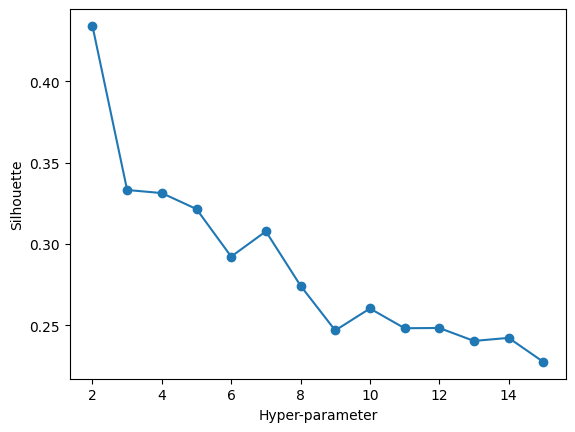

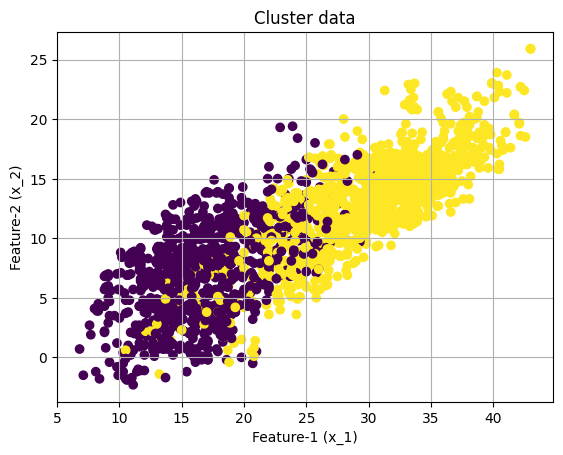

In [16]:
opt_labels = maximize_silhouette(X,algo="kmeans",nmax=15, i_plot=True)
plot(X,opt_labels)

K-Means clustering with a silhouette analysis suggested that two clusters were optimal for the data, achieving the highest silhouette score. The resulting clusters were visually distinct and segregated the data points effectively.

## DBSCAN

OPTIMAL PARAMETER = 0.5


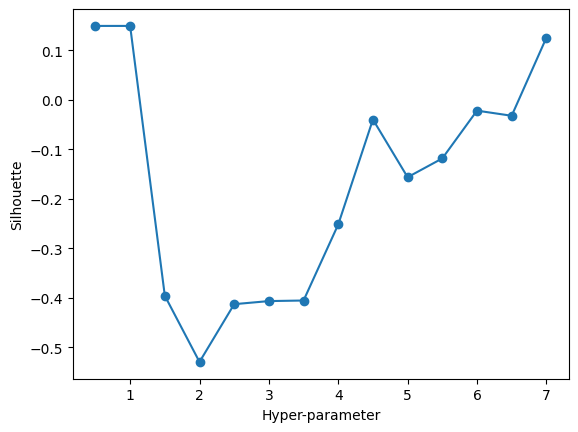

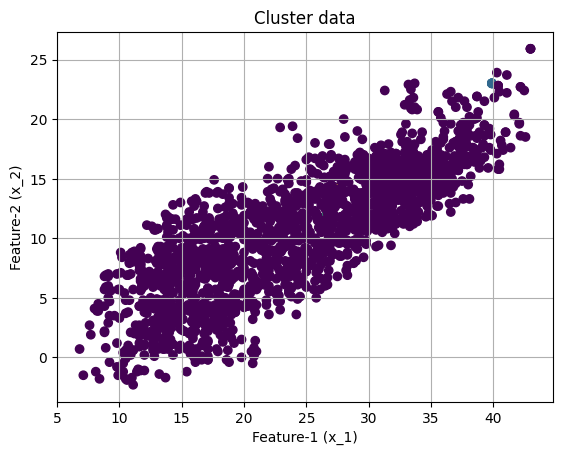

In [22]:
# DBSCAN
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, metric='euclidean', i_plot=True)
plot(X,opt_labels)

OPTIMAL PARAMETER = 0.5


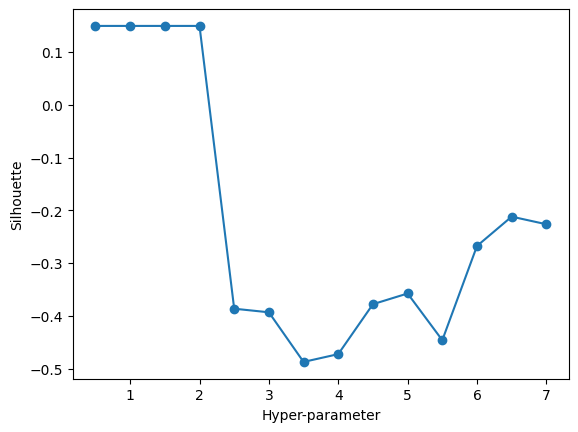

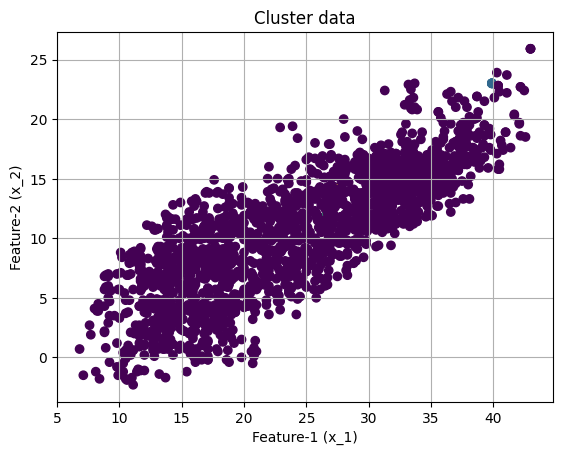

In [23]:
# DBSCAN
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, metric='manhattan', i_plot=True)
plot(X,opt_labels)

OPTIMAL PARAMETER = 7.0


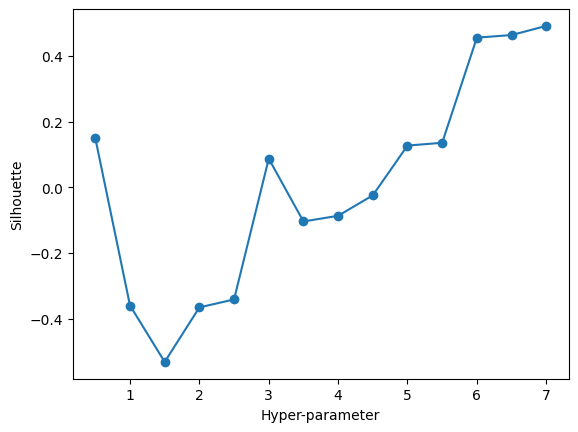

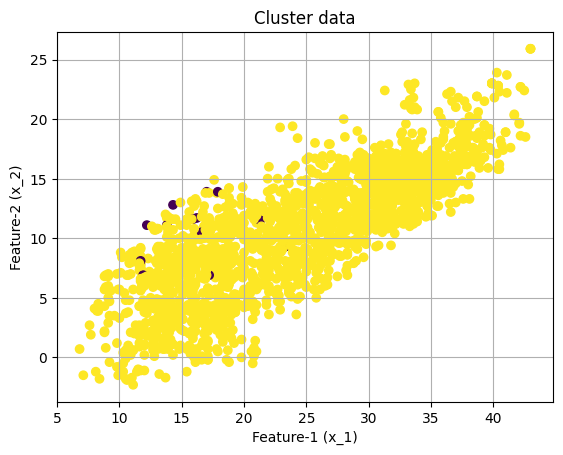

In [21]:
# DBSCAN
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, metric='chebyshev', i_plot=True)
plot(X,opt_labels)

DBSCAN, applied with various distance metrics (Euclidean, Manhattan, and Chebyshev), provided different clustering results. The silhouette scores varied significantly, with the Euclidean metric at a low epsilon value indicating densely packed data, while the Manhattan and Chebyshev metrics at higher epsilon values formed more distinct clusters.

## Agglomerative Clustering

OPTIMAL PARAMETER = 2


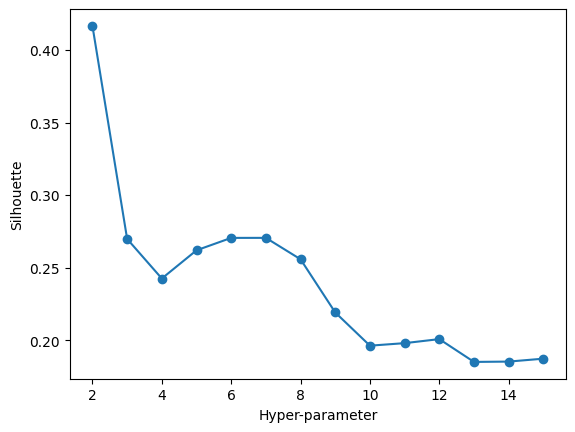

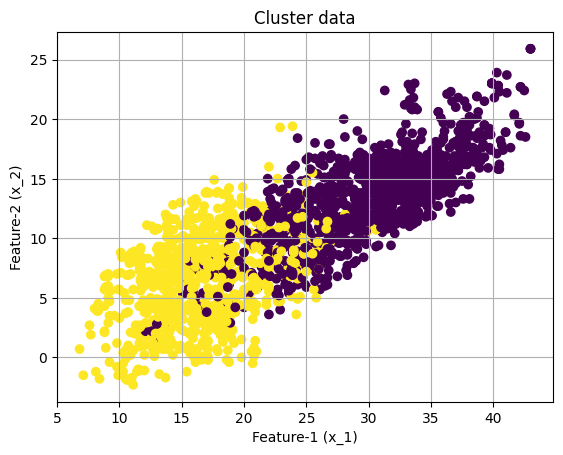

In [11]:
# AGGLOMERATIVE CLUSTERING
opt_labels=maximize_silhouette(X,algo="ag",nmax=15, i_plot=True)
plot(X,opt_labels)

Agglomerative Clustering also indicated two clusters as optimal. This method, which builds a hierarchy of clusters, showed a clear separation of data points into two groups.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


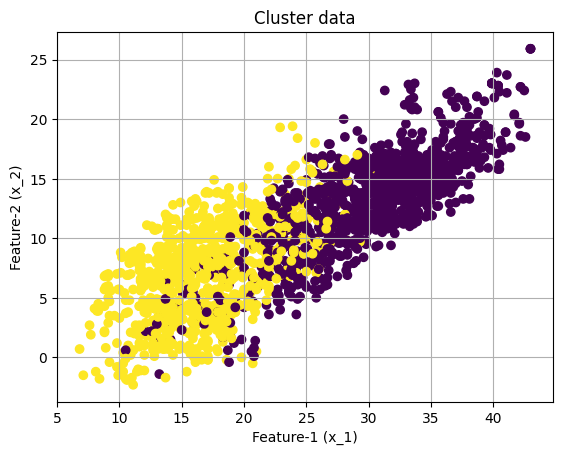

In [24]:
# KMEANS
model = sklearn.cluster.KMeans(n_clusters=2).fit(X)
labels=model.predict(X)
plot(X,labels)

## Model Selection and Cluster Visualization

Silhouette analysis was crucial in determining the optimal parameters for clustering, with each algorithm's results visualized in scatter plots. These plots provided a clear visual distinction between the clusters, especially for K-Means and Agglomerative Clustering, where two prominent groups were identified.

### Comparative Analysis
K-Means and Agglomerative Clustering both yielded high silhouette scores with two clusters, indicating a strong, distinct grouping within the data. DBSCAN, while useful in identifying density-based clusters, produced lower silhouette scores, suggesting that the data might not have a strong density-based structure or that the algorithm's parameters were not optimal for this particular dataset.

### Connections to Dataset Labels

The optimal clusters from K-Means and Agglomerative Clustering did not clearly coincide with any specific labels in the dataset. This could suggest that the relationship between the climate features and wildfire occurrences is complex and may not be linearly separable or directly observable through clustering alone.

The clustering analysis provided new insights into the data, especially regarding the underlying structure of the climate measurements. K-Means and Agglomerative Clustering, with their higher silhouette scores, suggest that there are two main conditions within the data that could potentially relate to wildfire risk.

## Conclusions

Our clustering analysis has uncovered two distinct groupings in California's climate data. While the direct correlation with wildfire occurrences remains uncertain, these findings can guide further investigation into specific climate conditions that may elevate wildfire risk. These insights can help inform preventive measures, resource allocation, and policy-making to mitigate the impact of wildfires on communities and ecosystems. It is a step forward in our understanding of how complex environmental data can be interpreted to protect and prepare the state for wildfire events.